# Import the dataset iris_dirty.csv from this repo into a Pandas dataframe. Check the Pandas documentation of read_csv() and use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('iris_dirty.csv',names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica


# Explore the data with the known Pandas functions head(), info(), describe(), count(), value_counts() (for all columns). Watch for missing values, duplicates, spelling errors, non-uniform units, columns with datatypes they shouldn't have etc.

In [6]:
df['sepal_length'].head(),df['sepal_width'].head(),df['petal_length'].head(),df['petal_width'].head(),df['class'].head()

(0    5.1
 1    4.9
 2    4.7
 3    4.6
 4    5.0
 Name: sepal_length, dtype: float64,
 0    3.5
 1    3.0
 2    3.2
 3    3.1
 4    3.6
 Name: sepal_width, dtype: float64,
 0    1.4
 1    1.4
 2    1.3
 3    1.5
 4    1.4
 Name: petal_length, dtype: float64,
 0    2 mm
 1    2 mm
 2    2 mm
 3    2 mm
 4    2 mm
 Name: petal_width, dtype: object,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: class, dtype: object)

In [7]:
df.info(['sepal_length']),df.info(['sepal_width']),df.info(['petal_length']),df.info(['petal_width']),df.info(['class'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (

(None, None, None, None, None)

In [8]:
df['sepal_length'].describe(),df['sepal_width'].describe(),df['petal_length'].describe(),df['petal_width'].describe(),df['class'].describe()

(count    151.000000
 mean       6.196689
 std        4.324325
 min        4.300000
 25%        5.100000
 50%        5.800000
 75%        6.400000
 max       58.000000
 Name: sepal_length, dtype: float64,
 count    150.000000
 mean       3.057333
 std        0.432776
 min        2.000000
 25%        2.800000
 50%        3.000000
 75%        3.300000
 max        4.400000
 Name: sepal_width, dtype: float64,
 count    151.000000
 mean       3.764901
 std        1.760197
 min        1.000000
 25%        1.600000
 50%        4.400000
 75%        5.100000
 max        6.900000
 Name: petal_length, dtype: float64,
 count      151
 unique      22
 top       2 mm
 freq        28
 Name: petal_width, dtype: object,
 count                 151
 unique                  4
 top       Iris-versicolor
 freq                   51
 Name: class, dtype: object)

In [9]:
df['sepal_length'].count(),df['sepal_width'].count(),df['petal_length'].count(),df['petal_width'].count(),df['class'].count()

(151, 150, 151, 151, 151)

In [10]:
df['sepal_length'].value_counts(),df['sepal_width'].value_counts(),df['petal_length'].value_counts(),df['petal_width'].value_counts(),df['class'].value_counts()

(5.0     10
 5.1      9
 6.3      9
 6.7      8
 5.7      8
 6.4      7
 5.5      7
 5.6      6
 5.4      6
 6.1      6
 6.0      6
 5.8      6
 4.9      6
 6.5      5
 4.8      5
 6.9      4
 5.2      4
 4.6      4
 6.2      4
 7.7      4
 5.9      3
 4.4      3
 6.8      3
 7.2      3
 4.7      2
 6.6      2
 7.0      2
 7.3      1
 7.9      1
 7.4      1
 5.3      1
 7.6      1
 7.1      1
 4.3      1
 4.5      1
 58.0     1
 Name: sepal_length, dtype: int64,
 3.0    26
 3.2    14
 2.8    14
 3.1    12
 3.4    12
 2.9    10
 2.5     8
 2.7     8
 3.5     6
 3.3     6
 3.8     6
 2.6     5
 2.3     4
 3.7     3
 2.4     3
 2.2     3
 3.6     3
 3.9     2
 4.4     1
 4.0     1
 4.1     1
 4.2     1
 2.0     1
 Name: sepal_width, dtype: int64,
 1.5    14
 1.4    12
 5.1     8
 4.5     8
 1.6     7
 1.3     7
 5.6     6
 4.7     6
 4.9     5
 4.0     5
 4.2     4
 5.0     4
 4.4     4
 4.8     4
 1.7     4
 3.9     3
 4.6     3
 5.7     3
 4.1     3
 5.5     3
 6.1     3
 5.8     3
 3.3

# Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.

In [11]:
df=df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


In [13]:
nulls_df=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df=nulls_df.rename(columns={'index':'header',0:'prop_nulls'})
nulls_df

,prop_nulls
sepal_length,0.00
sepal_width,0.68
petal_length,0.00
petal_width,0.00
class,0.00


In [14]:
mean=df['sepal_width'].mean()
df['sepal_width']=df['sepal_width'].fillna(mean)

In [15]:
nulls_df=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df=nulls_df.rename(columns={'index':'header',0:'prop_nulls'})
nulls_df

,prop_nulls
sepal_length,0.0
sepal_width,0.0
petal_length,0.0
petal_width,0.0
class,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


In [17]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        47
Iris-setsoa         1
Name: class, dtype: int64

In [18]:
df['class'] = df['class'].replace({'Iris-setsoa':'Iris-setosa'})

In [19]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        48
Name: class, dtype: int64

# Bring all columns to centimeter length. Before, transform any column to numeric if necessary.

In [20]:
df['petal_width']

0       2 mm
1       2 mm
2       2 mm
3       2 mm
4       2 mm
       ...  
146    23 mm
147    19 mm
148    20 mm
149    23 mm
150    18 mm
Name: petal_width, Length: 148, dtype: object

In [21]:
df['petal_width'] = df['petal_width'].str.replace("mm","")

In [22]:
df['petal_width']

0       2 
1       2 
2       2 
3       2 
4       2 
      ... 
146    23 
147    19 
148    20 
149    23 
150    18 
Name: petal_width, Length: 148, dtype: object

In [23]:
df['petal_width'] = df['petal_width'].astype(int)

In [24]:
df['petal_width'] = df['petal_width']/10

In [25]:
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal_width, Length: 148, dtype: float64

# Check for outliers with .describe() or means of plotting. Think about the appropriate way to correct for possible outliers and perform that correction.

In [26]:
df['sepal_length'].describe(),df['sepal_width'].describe(),df['petal_length'].describe(),df['petal_width'].describe(),df['class'].describe()

(count    148.000000
 mean       6.208784
 std        4.365089
 min        4.300000
 25%        5.100000
 50%        5.800000
 75%        6.400000
 max       58.000000
 Name: sepal_length, dtype: float64,
 count    148.000000
 mean       3.055782
 std        0.435520
 min        2.000000
 25%        2.800000
 50%        3.000000
 75%        3.300000
 max        4.400000
 Name: sepal_width, dtype: float64,
 count    148.000000
 mean       3.789189
 std        1.756470
 min        1.000000
 25%        1.600000
 50%        4.400000
 75%        5.100000
 max        6.900000
 Name: petal_length, dtype: float64,
 count    148.000000
 mean       1.213514
 std        0.757426
 min        0.100000
 25%        0.300000
 50%        1.300000
 75%        1.800000
 max        2.500000
 Name: petal_width, dtype: float64,
 count                 148
 unique                  3
 top       Iris-versicolor
 freq                   50
 Name: class, dtype: object)

In [27]:
# we can see from the describe method that sepal_length has an outlier/s.

In [28]:
X_num=df.select_dtypes(include=np.number)

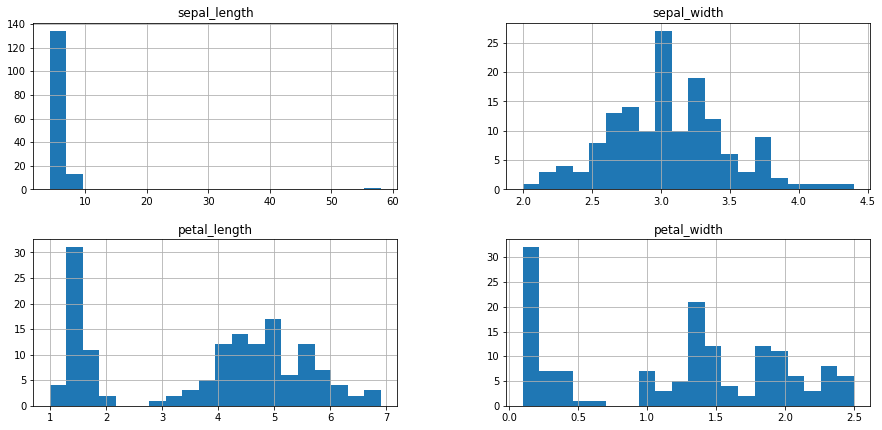

In [29]:
X_num.hist(figsize=(15,15),bins=20,layout=(4,2));

In [30]:
df['sepal_length'].value_counts()

5.0     10
5.1      9
6.3      9
6.7      8
5.7      8
5.5      7
6.4      7
5.6      6
5.4      6
6.1      6
6.0      6
5.8      6
6.5      5
4.8      5
4.6      4
5.2      4
6.9      4
4.9      4
7.7      4
6.2      4
5.9      3
4.4      3
6.8      3
7.2      3
6.6      2
4.7      2
7.3      1
7.9      1
7.4      1
4.5      1
7.6      1
7.1      1
5.3      1
4.3      1
7.0      1
58.0     1
Name: sepal_length, dtype: int64

In [31]:
# we assume that in the sepal_length column the max value, is an outlier, a typo error. 
# So we just have to change the number, instead of 58 must be 5.8

In [32]:
maxim = max(df['sepal_length'])/10

In [33]:
df['sepal_length']=df['sepal_length'].replace(to_replace=58,value=maxim)

In [34]:
df['sepal_length'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
4.9     4
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

In [35]:
X_num=df.select_dtypes(include=np.number)

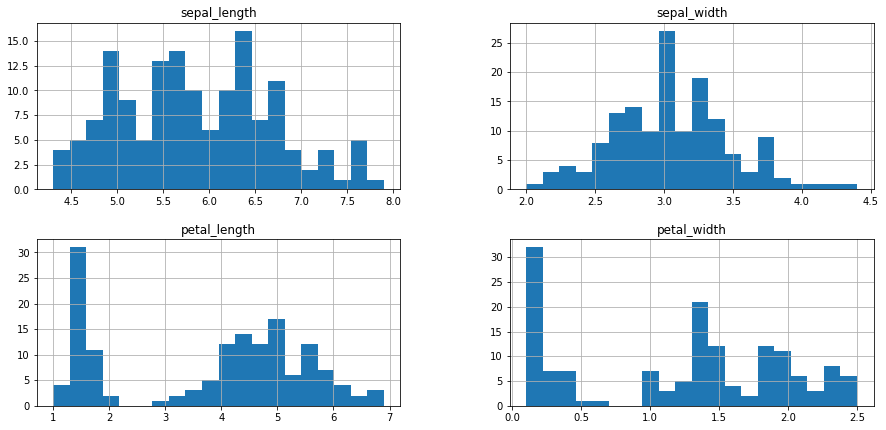

In [36]:
X_num.hist(figsize=(15,15),bins=20,layout=(4,2));

# Plot a correlation matrix with a heatmap between the numeric features.

In [37]:
corre_matrix=X_num.corr()
corre_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109319,0.869281,0.814322
sepal_width,-0.109319,1.000000,-0.424050,-0.360508
petal_length,0.869281,-0.424050,1.000000,0.961975
petal_width,0.814322,-0.360508,0.961975,1.000000


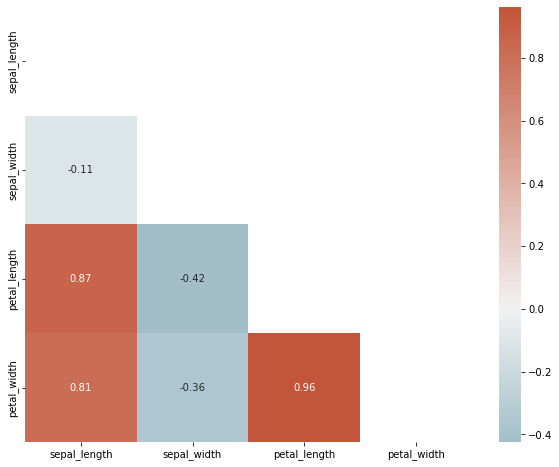

In [38]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True,);

# Model the relationship between our features (the four numeric flower metrics) and the label (class) with Logistic Regression using LogisticRegression() from the sklearn.linear_model module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.

In [39]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        48
Name: class, dtype: int64

In [40]:
y=df['class']

In [41]:
X_full=df.drop('class',axis=1) 
# we do not need to scale cause the dispersion between the different values is not too significant.
#Nevertheless, using the robustScaler method, the accuracy_score is a lower value, 0.83.

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_full,y,test_size=0.3,random_state=40)

In [43]:
classification= LogisticRegression(max_iter=500)
classification.fit(X_train,y_train)
y_test_pred=classification.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9333333333333333

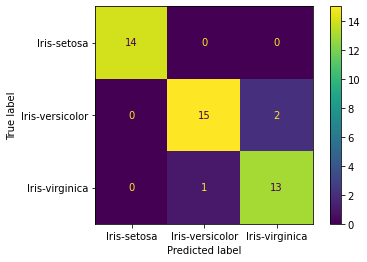

In [44]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(classification,X_test, y_test)

# BONUS: Use all the rows of your data and your trained model to predict the flower classes. Then create pairwise scatterplots between all four features (6 in total) in which you color the dots depending which predicted flower class they belong to. Try to make out distinct clusters in those plots.

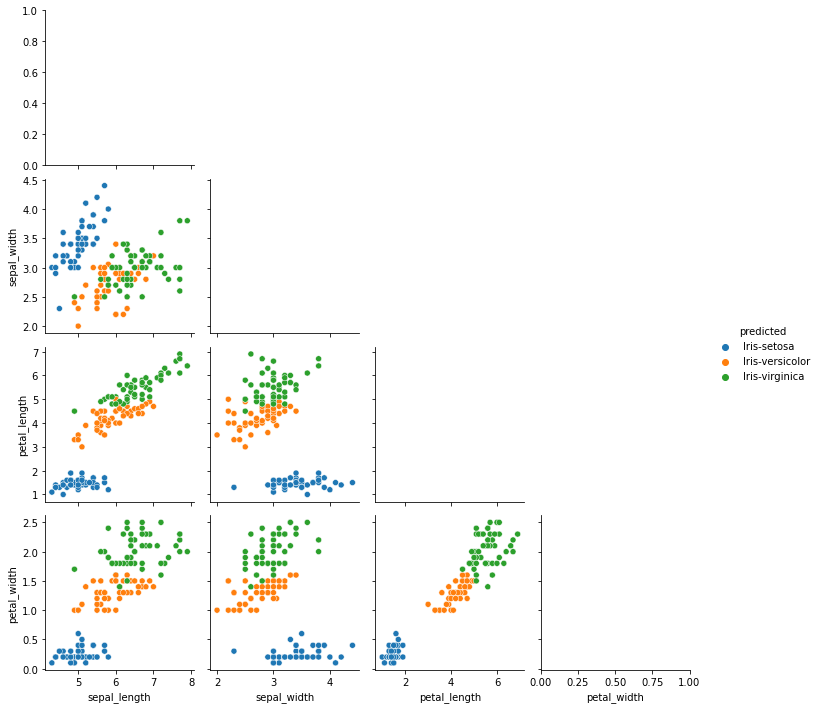

In [45]:
X_full['predicted']=classification.predict(X_full)
sns.pairplot(X_full, hue="predicted", corner=True, diag_kind='None')
plt.show()